In [1]:
import pandas as pd
import numpy as np

In [5]:
events = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')
submissions = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')

In [13]:
events['date'] = pd.to_datetime(events.timestamp, unit = 's')
events['day'] = events.date.dt.date
events.head()

,step_id,timestamp,action,user_id,day,date
0,32815,1434340848,viewed,17632,2015-06-15,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15,2015-06-15 04:01:35


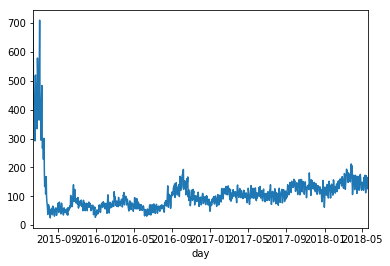

In [16]:
events.groupby('day').user_id.nunique().plot()

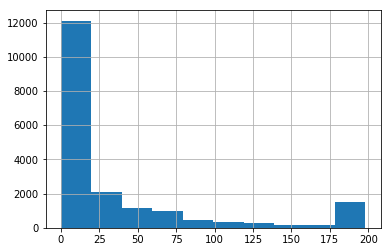

In [21]:
events.pivot_table(index = 'user_id', 
                    columns = 'action', 
                    values = 'step_id', 
                    aggfunc = 'count', 
                    fill_value = 0
                   ).reset_index().discovered.hist()

In [30]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
df.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [8]:
#В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.
subset_1 = df.iloc[0:10, [1, 3]]
subset_1.head(10)

,V2,V4
0,13.0,1.0
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
4,10.0,-1.0
5,11.0,0.0
6,9.0,2.0
7,9.0,1.0
8,9.0,2.0
9,10.0,0.0


In [24]:
#В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.
subset_2 = df.loc[:,['V2', 'V4']].drop([0, 4])
subset_2.head()

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0


In [33]:
#В переменную subset_1 сохраните только те наблюдения, у которых значения переменной V1  строго больше 0, 
#и значение переменной V3  равняется 'A'.

subset_1 = df.query("V1 > 0  & V3 == 'A'")

In [36]:
#В переменную  subset_2  сохраните только те наблюдения, у которых значения переменной V2  не равняются 10, 
#или значения переменной V4 больше или равно 1.

subset_2 = df.query('V2 != 10 | V4 >= 1')

In [46]:
#V5 = V1 + V4
df['V5'] = df['V1'] + df['V4']

In [44]:
#V6 = натуральный логарифм переменной V2
df['V6'] = np.log(df['V2'])
df.head()

In [47]:
df.rename(columns = {'V1':'session_value', \
                     'V2':'group', \
                     'V3':'time', \
                     'V4':'n_users' \
                    })

,session_value,group,time,n_users,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585
5,2,11.0,A,0.0,2.0,2.397895
6,0,9.0,A,2.0,2.0,2.197225
7,1,9.0,A,1.0,2.0,2.197225
8,0,9.0,B,2.0,2.0,2.197225
9,-1,10.0,A,0.0,-1.0,2.302585


In [56]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
df.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [63]:
df['session_value'] = df['session_value'].fillna(0)

In [64]:
df.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
